In [1]:
from skimage.feature import hog
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import image
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from skimage.color import rgb2gray

### Image feature Technique

C:\Users\soyvi\AppData\Local\Temp\ipykernel_276\4142556888.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


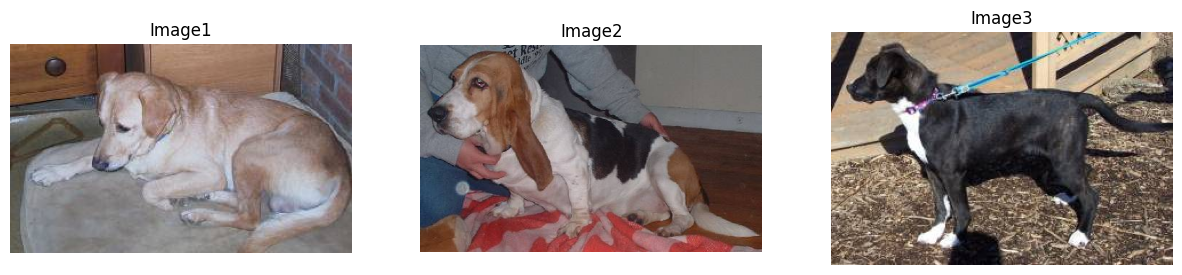

In [2]:
# img_cat = np.array(image.imread("./dataset/train2/cats/75552.jpg"))
# img_cat.setflags(write=1)
# print('Image: ', img_cat.shape)
# plt.imshow(img_cat)
# plt.show()

dog_files = glob.glob("./dataset/train2/dogs/*.jpg")
img_plt1 = plt.imread(dog_files[20])
img_plt2 = plt.imread(dog_files[21])
img_plt3 = plt.imread(dog_files[22])

fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].imshow(img_plt1)
axs[1].imshow(img_plt2)
axs[2].imshow(img_plt3)
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")
axs[0].set_title('Image1')
axs[1].set_title('Image2')
axs[2].set_title('Image3')
fig.show()

### Resizing Image
    Resizing the image to reduce the pixels to get the training faster but it will make less accurate. There is a tradeoff between speed and accuracy. For good computer we can take more features


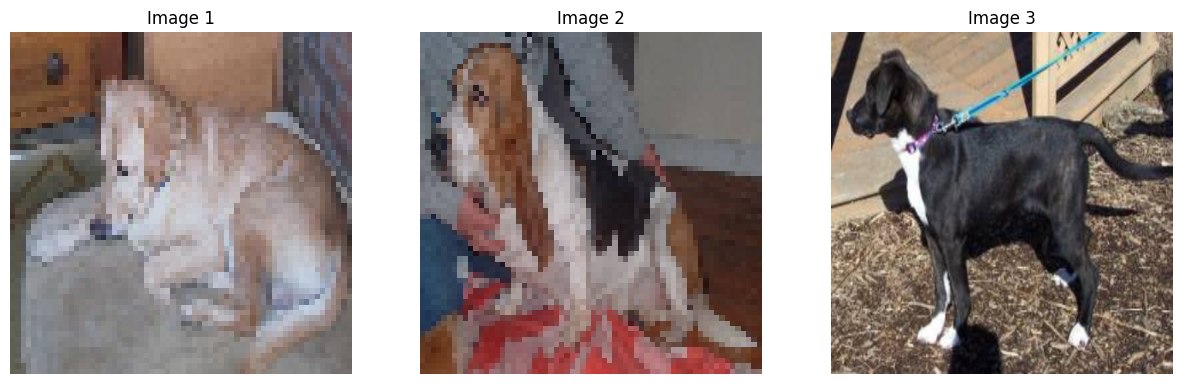

In [3]:
resized_images1 = cv2.resize(img_plt1, (64, 64))
resized_images2 = cv2.resize(img_plt2, (64, 64))
resized_images3 = cv2.resize(img_plt3, (400, 400))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(resized_images1)
axs[1].imshow(resized_images2)
axs[2].imshow(resized_images3)
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")
axs[0].set_title('Image 1')
axs[1].set_title('Image 2')
axs[2].set_title('Image 3')
plt.show()

### Hog Feature
We get 6804 Features for a single picture. These 6804 features will be used to identify a picture(i.e. label)


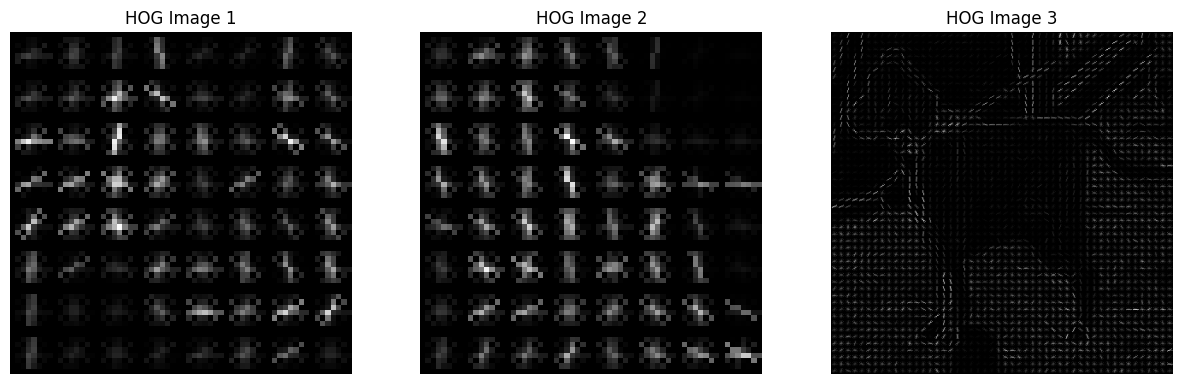

In [4]:
gray_image1 = rgb2gray(resized_images1)
gray_image2 = rgb2gray(resized_images2)
gray_image3 = rgb2gray(resized_images3)

fd1, hog_image1 = hog(gray_image1, visualize=True)
fd2, hog_image2 = hog(gray_image2, visualize=True)
fd3, hog_image3 = hog(gray_image3, visualize=True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(hog_image1, cmap="gray")
axs[1].imshow(hog_image2, cmap="gray")
axs[2].imshow(hog_image3, cmap="gray")
axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")
axs[0].set_title('HOG Image 1')
axs[1].set_title('HOG Image 2')
axs[2].set_title('HOG Image 3')
plt.show()

### Training Dataset

In [5]:
# Dog Train

data_dogs = []
for entry in glob.glob("./dataset/train2/dogs/*jpg"):
    img = np.array(image.imread(entry))
    resized_img = cv2.resize(img, (64, 64))
    fd = hog(resized_img, channel_axis=-1)
    data_dogs.append(fd)
    
# Cat Train
data_cats = []
for entry in glob.glob("./dataset/train2/cats/*jpg"):
    img = np.array(image.imread(entry))
    resized_img = cv2.resize(img, (64, 64))
    fd = hog(resized_img, channel_axis=-1)
    data_cats.append(fd)
    
# combined Train data
train_data = data_dogs + data_cats
print("Image Dogs: ",len(data_dogs))
print("Image Cats : ",len(data_cats))
print("Image Totals : ",len(train_data))

Image Dogs:  363
Image Cats :  379
Image Totals :  742


### Train Data labeling

In [6]:
train_lable_list = []
for i in range(len(train_data)):
    if i < 363:
        train_lable_list.append('dog')
    else:
        train_lable_list.append('cat')
print(train_lable_list)
print(len(train_lable_list))

['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog'

### Test Data

In [7]:
# Labled dog test data
test_dogs = []
for entry in glob.glob("./dataset/valid2/dogs/*jpg"):
    img = np.array(image.imread(entry))
    resized_img = cv2.resize(img, (64, 64))
    fd = hog(resized_img, channel_axis= -1)
    test_dict = {'data':fd, 'lable':'dog'}
    test_dogs.append(test_dict)
    
# Labled cat test data
test_cats = []
for entry in glob.glob("./dataset/valid2/cats/*jpg"):
    img = np.array(image.imread(entry))
    resized_img = cv2.resize(img, (64, 64))
    fd = hog(resized_img, channel_axis= -1)
    test_dict = {'data':fd, 'lable':'cat'}
    test_cats.append(test_dict)

# labled combined test data
test_data = test_dogs + test_cats
print("Test dogs :",len(test_dogs))
print("Test cats :",len(test_cats))
print("Test Totals :",len(test_data))

Test dogs : 182
Test cats : 160
Test Totals : 342


Seperating Data and labels to different lists

In [8]:
test_features = []
test_lables = []
for i in test_data:
    test_lables.append(i['lable'])
    test_features.append(i['data'])
print(len(test_features), len(test_lables))
print(test_lables)

342 342
['dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog

### KNN Implementation

In [9]:
x_axis_k_points = []
f1_manhattan = []
accuracies_manhattan = []
conf_matrix_manhattan = []

for k in range(25):
    # knn classifier training
    knn_manhattan = KNeighborsClassifier(n_neighbors= k + 1, p = 1)
    knn_manhattan.fit(train_data, train_lable_list)
    
    # knn classifier prediction
    pred_lables_manhattan = knn_manhattan.predict(test_features)
    
    # Accuracy of prediction
    acc_manhattan = knn_manhattan.score(test_features, test_lables)
    accuracies_manhattan.append(acc_manhattan)
    
    # confusion Matrix of prediction
    conf_matrix_manhattan.append(metrics.confusion_matrix(test_lables, pred_lables_manhattan))
    
    # f1 score of prediction
    f1_manhattan.append(metrics.f1_score(test_lables, pred_lables_manhattan, pos_label='dog'))
    
    x_axis_k_points.append(k+1)

### Saving the best model

In [10]:
best_k = np.argmax(f1_manhattan) + 1  # Find the best value of k based on maximum F1 score
best_model = KNeighborsClassifier(n_neighbors=best_k, p=1)
best_model.fit(train_data, train_lable_list)

# Save the best model
import joblib
joblib.dump(best_model, './Model/best_model1.pkl')

['./Model/best_model1.pkl']

In [11]:
f1_manhattan, pred_lables_manhattan

([0.7180851063829788,
  0.6366559485530546,
  0.7512953367875648,
  0.722543352601156,
  0.7291666666666666,
  0.7267605633802817,
  0.7621483375959078,
  0.7313019390581718,
  0.7570332480818415,
  0.7391304347826086,
  0.7707808564231738,
  0.7547169811320754,
  0.7712082262210798,
  0.7520435967302452,
  0.7866323907455014,
  0.7807486631016043,
  0.772378516624041,
  0.7608695652173912,
  0.7735368956743003,
  0.7647058823529411,
  0.7735368956743003,
  0.763925729442971,
  0.7700258397932815,
  0.768421052631579,
  0.7786259541984734],
 array(['dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog',
        'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
        'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog',
        'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat',
        'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog',
        'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog',
        'cat', 'dog', 'dog'

### Score
Manhattan Score

In [12]:
for i in range(len(f1_manhattan)):
    print('FOR K = ', i + 1, 'F1 Score :', f1_manhattan[i], 'Accuracy : ', accuracies_manhattan[i], '\nConfusion Matrics :\n', conf_matrix_manhattan )

FOR K =  1 F1 Score : 0.7180851063829788 Accuracy :  0.6900584795321637 
Confusion Matrics :
 [array([[101,  59],
       [ 47, 135]], dtype=int64), array([[130,  30],
       [ 83,  99]], dtype=int64), array([[101,  59],
       [ 37, 145]], dtype=int64), array([[121,  39],
       [ 57, 125]], dtype=int64), array([[ 98,  62],
       [ 42, 140]], dtype=int64), array([[116,  44],
       [ 53, 129]], dtype=int64), array([[100,  60],
       [ 33, 149]], dtype=int64), array([[113,  47],
       [ 50, 132]], dtype=int64), array([[ 99,  61],
       [ 34, 148]], dtype=int64), array([[110,  50],
       [ 46, 136]], dtype=int64), array([[ 98,  62],
       [ 29, 153]], dtype=int64), array([[111,  49],
       [ 42, 140]], dtype=int64), array([[103,  57],
       [ 32, 150]], dtype=int64), array([[113,  47],
       [ 44, 138]], dtype=int64), array([[106,  54],
       [ 29, 153]], dtype=int64), array([[114,  46],
       [ 36, 146]], dtype=int64), array([[102,  58],
       [ 31, 151]], dtype=int64), arra

### Ploting Score

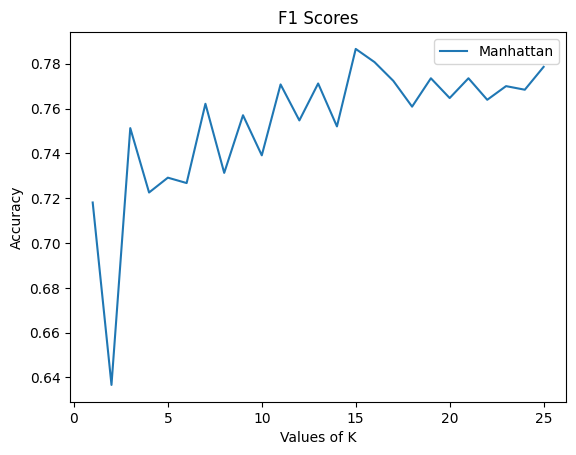

In [13]:
# F1 Scores
plt.plot(x_axis_k_points, f1_manhattan, label = 'Manhattan')
plt.title('F1 Scores')
plt.xlabel("Values of K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Load model and make prediction

In [14]:
# Load the saved model
loaded_model = joblib.load('./Model/best_model1.pkl')

# Use the loaded model for prediction
pred_labels = loaded_model.predict(test_features)

In [15]:
import os

# Prediction on images in the folder
pred_images = []
pred_file_names = []
for entry in glob.glob("./dataset/test/*.jpg"):
    img = np.array(image.imread(entry))
    resized_img = cv2.resize(img, (64, 64))
    fd = hog(resized_img, channel_axis=-1)
    pred_images.append(fd)
    pred_file_names.append(os.path.basename(entry))

# Make predictions
pred_labels = loaded_model.predict(pred_images)

# Write predictions to a file
output_file = "./Model/predictions64x64.txt"
with open(output_file, "w") as f:
    for file_name, label in zip(pred_file_names, pred_labels):
        f.write(f"{file_name}: {label}\n")

print("Predictions written to", output_file)

Predictions written to ./Model/predictions64x64.txt


### Make prediction and plot them

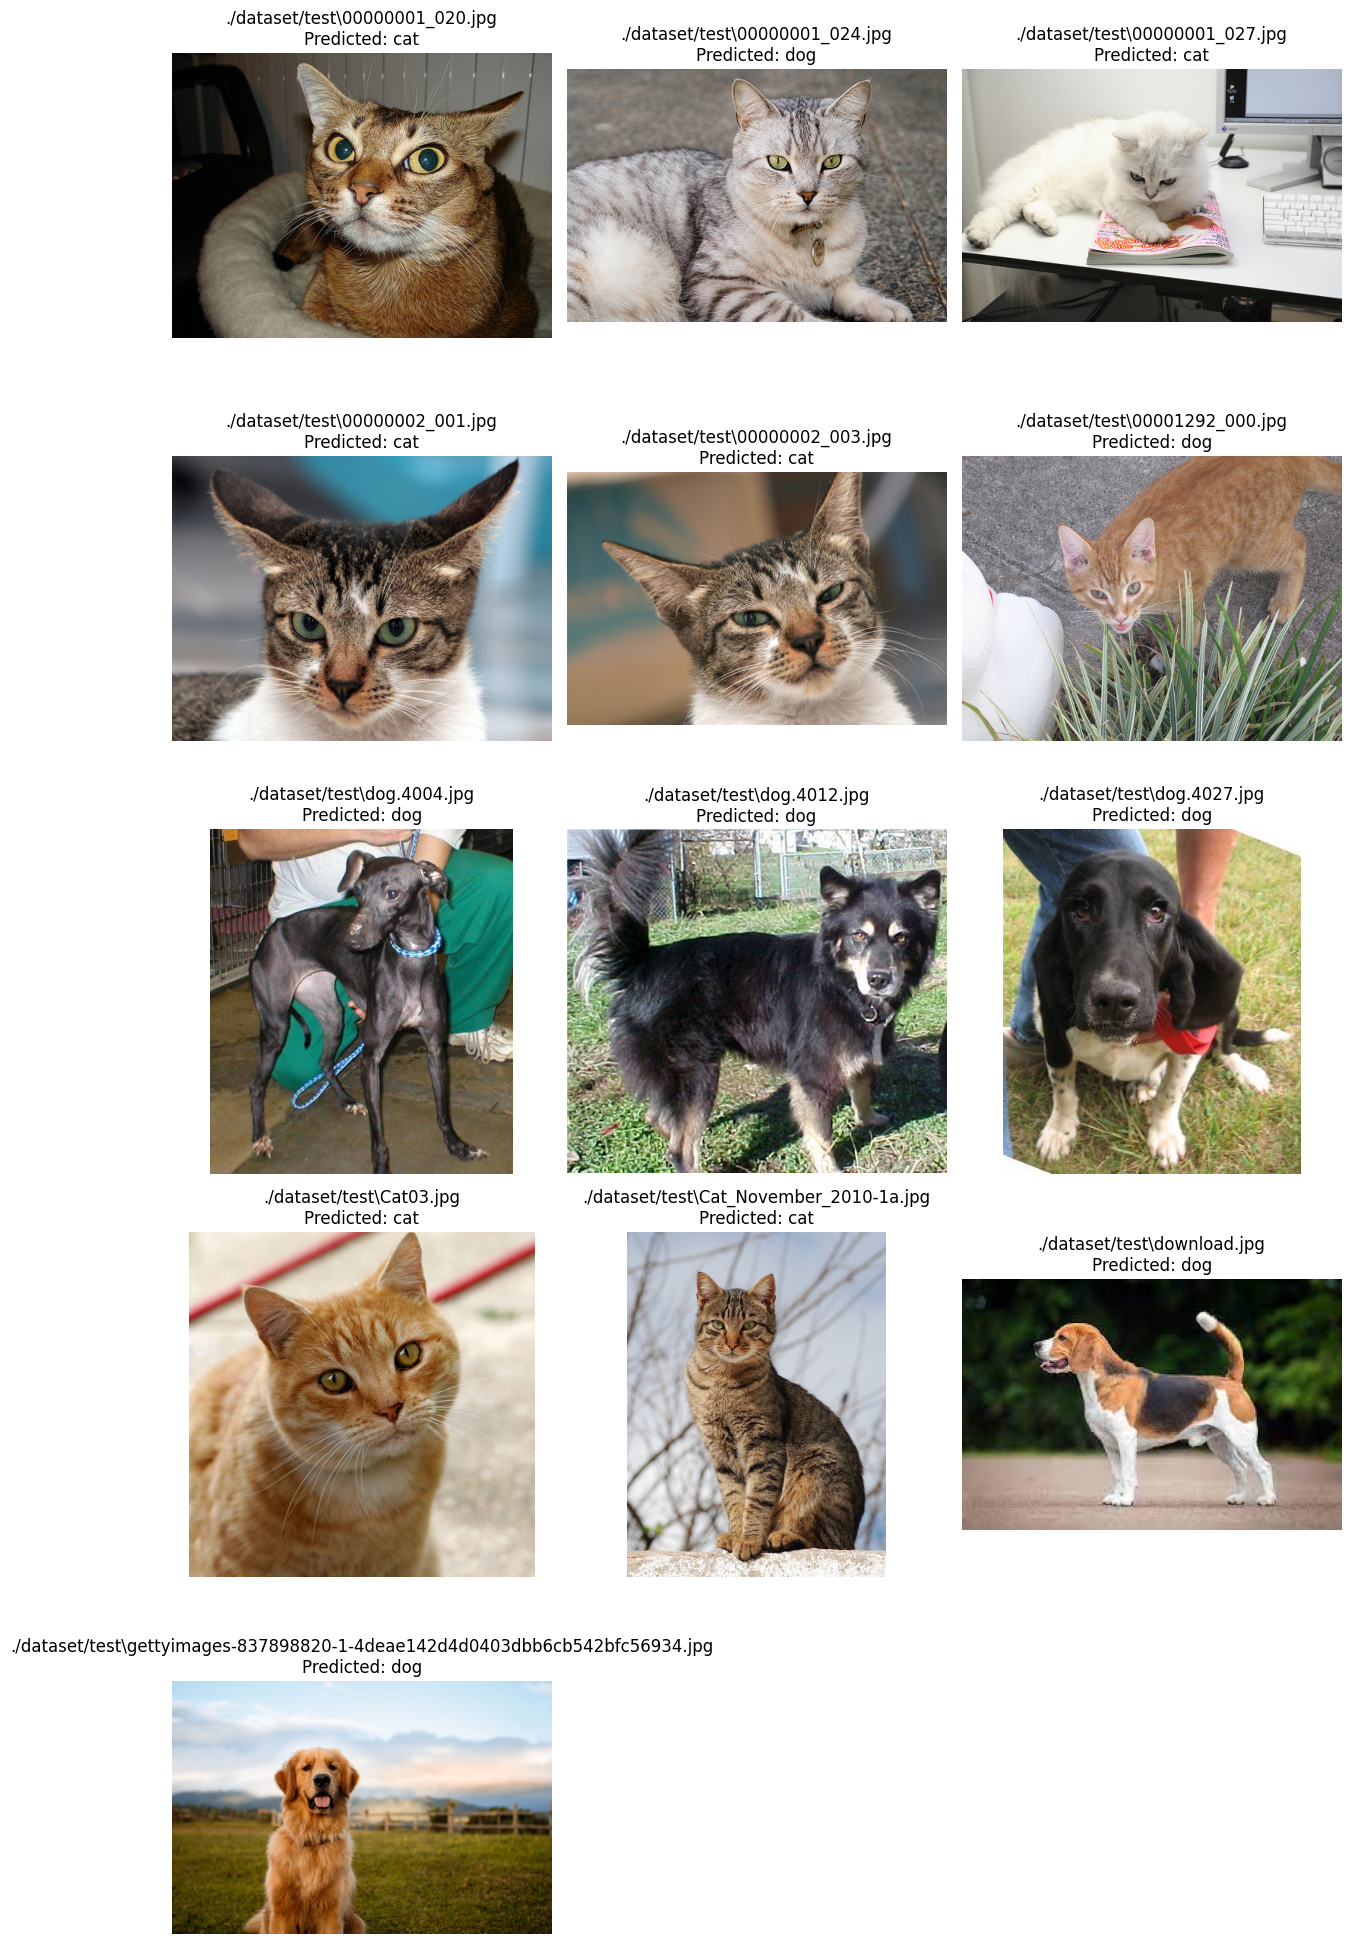

In [18]:
import glob
from matplotlib import image
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Load the saved model
loaded_model = joblib.load('./Model/best_model1.pkl')

# Prediction on images in the folder
pred_images = []
pred_file_names = []
for entry in glob.glob("./dataset/test/*.jpg"):
    img = np.array(image.imread(entry))
    resized_img = cv2.resize(img, (64, 64))
    fd = hog(resized_img, channel_axis=-1).ravel()  # Flatten the HOG features to a 1D array
    pred_images.append(fd)
    pred_file_names.append(entry)

# Make predictions
pred_labels = loaded_model.predict(pred_images)

# Plot images with predictions
num_images = len(pred_images)
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

for i, (image, file_name, label) in enumerate(zip(pred_images, pred_file_names, pred_labels)):
    ax = axes[i // num_cols, i % num_cols]
    img = cv2.cvtColor(cv2.imread(file_name), cv2.COLOR_BGR2RGB)  # Read and convert image to RGB format
    ax.imshow(img)
    ax.set_title(f"{file_name}\nPredicted: {label}")
    ax.axis('off')

# Remove any unused subplots
if num_images < num_cols * num_rows:
    for i in range(num_images, num_cols * num_rows):
        fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()